<a href="https://colab.research.google.com/github/zerobbang/study_colab/blob/main/hongong/ch4_1_Rogistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **로지스틱 회귀**
: 기초 통계(의학통계) / 머신러닝 분류모형의 기초 모형 / 딥러닝의 초기 모형

- 생선 데이터 불러오기

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


- 데이터 변환

입력 데이터 - 생선 데이터를 numpy를 이용해 배열로 변환한다.

In [2]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_input.shape

(159, 5)

타겟 데이터 - 종에 따라 비교하기 위해 numpy를 이용해 배열로 변환한다.

In [3]:
fish_target = fish['Species'].to_numpy()

- 훈련 데이터와 테스트 데이터 분류

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split( fish_input, fish_target ,random_state = 42)

- 표준화 데이터 전처리

  무게는 g, 나머지는 cm단위 -> 단위 처리의 필요성 -> **표준화**

In [5]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

# 훈련 데이터와 테스트 데이터를 같이 표준화 한다.
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(train_input[:5])
print(train_scaled[:5])

[[720.      35.      40.6     16.3618   6.09  ]
 [500.      45.      48.       6.96     4.896 ]
 [  7.5     10.5     11.6      1.972    1.16  ]
 [110.      22.      23.5      5.5225   3.995 ]
 [140.      20.7     23.2      8.5376   3.2944]]
[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]


-> 단위에 따른 왜곡을 없애기 위해 훈련 데이터와 테스트 데이터를 표준화 하였다.

- k-최근접 이웃 분류 확률 예측

In [6]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


- 다중분류

  proba() 메서드는 클래스별 확률값을 반환한다.
  
  (decimals는 표시할 소수점 자리수 의미)

In [7]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 4))
print(kn.classes_)

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


    0번재 데이터 Perch일 확률 1
    
    ...  

    4번재 데이터 Perch일 확률 0.6667, Roach일 확률 0.3333

##### **로지스틱 회귀 모델**

- 로지스틱 함수 = 시그모이드 함수 => 확률로 변환해주는 함수  (다중 분류일 경우에는 소프트 맥스 함수 사용)

  phi = 1 / ( 1 + e^(-z) )

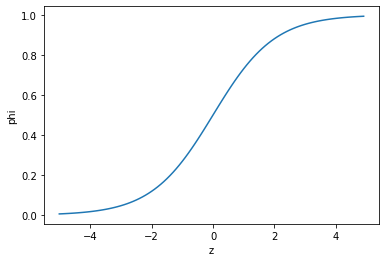

In [8]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5,5,0.1)
phi = 1 / (1 + np.exp(-z))

fig, ax = plt.subplots()
ax.plot(z, phi)
ax.set_xlabel('z')
ax.set_ylabel('phi')
fig.show()

##### 로지스틱 회귀로 이진 분류 수행하기

In [9]:
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True,False,True,False,False]])

['A' 'C']


- 데이터 전처리

1.   종이 Bream 이거나 Smelt인 데이터들만 뽑아내어 bream_smelt_indexs에 저장한다.
2.   훈련 세트와 테스트 세트로 표준화하여 분류한다.



In [10]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

- 모델 훈련

fit( 독립 변수, 종속 변수)

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

- 예측

로지스틱 함수를 통해 0.5값을 기준으로 이진 분류를 수행한다.

In [12]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [13]:
print(lr.predict_proba(train_bream_smelt[:5]))
print(lr.classes_)

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
['Bream' 'Smelt']


-> 예측값과 비교하여 proba 메서드를 통해 클래스별 확률값을 보면 결과가 동일 하다.

- 방정식의 각 기울기와 상수 구하기

  coef_ : 기울기, intercept_ : 상수

In [14]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


-> -0.4 * (Weight) -0.57 * (Length) -0.663 * (Diagonal) -1.01 * (Height) -0.732 * (Width) - 2.16

- z 값 출력

In [15]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


출력된 z값을 시그모이드 함수를 통과 시키면 확률을 얻을 수 있다.

이 과정을 **Python**의 **Scipy** 라이브러리의 **expit** 메서드를 통해서 **시그모이드 함수**를 구현할 수 있다.

In [16]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


-> 지금 출련된 값과 위에서 다뤘던 다음 코드를 통해 나온 출련된 값의 두번째 열은 같다.


```
print(lr.predict_proba(train_bream_smelt[:5]))
```

## 정리 - 이진 분류에서
- predict_proba() 메서드는 음성 클래스와 양성 클래스에 대한 확률을 출력
- dicision_function() 메서드는 양성 클래스에 대한 z값을 출력
- predict을 통해 coef_(기울기), intercept_(상수)값 출력 가능